### Import libraries

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, matthews_corrcoef

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Warnings
import warnings

warnings.filterwarnings('ignore')

# Import custom functions
import sys
import os

sys.path.append(os.path.abspath('../'))


### Model training and Evaluation Function 

### Read Data

In [6]:
df_raw = pd.read_csv('train.csv')

In [7]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df_raw.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Exploratory Data Analysis 

In [11]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


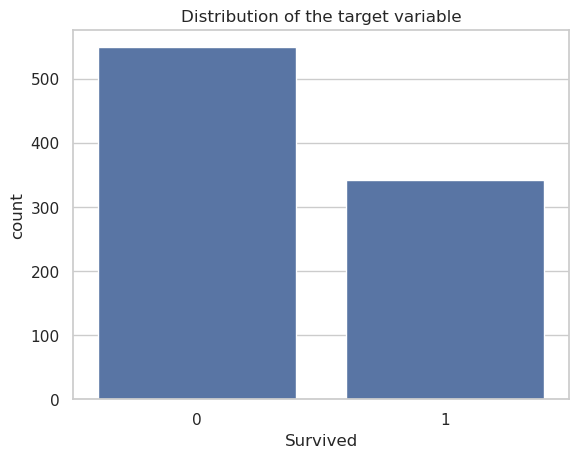

In [12]:
# Distribution of the target variable

sns.countplot( x='Survived', data=df)
plt.title('Distribution of the target variable')
plt.show()

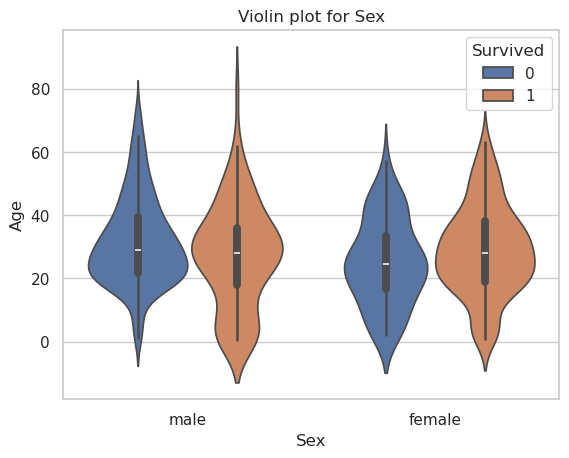

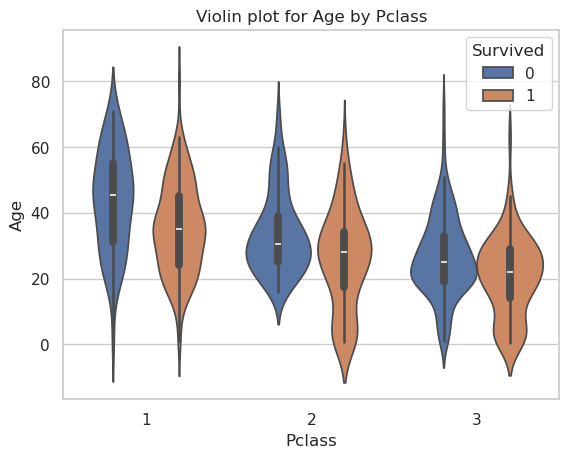

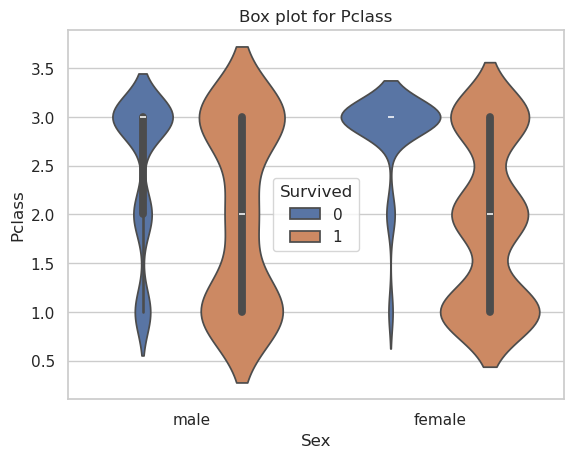

In [13]:
# Violine plot

sns.violinplot(x='Sex', y='Age', data=df, hue='Survived')
plt.title('Violin plot for Sex')
plt.show()


sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived')
plt.title('Violin plot for Age by Pclass')
plt.show()


sns.violinplot(x='Sex', y='Pclass', data=df, hue='Survived')
plt.title('Box plot for Pclass')
plt.show()

In [14]:
# Copy the dataframe
df_eda = df.copy()

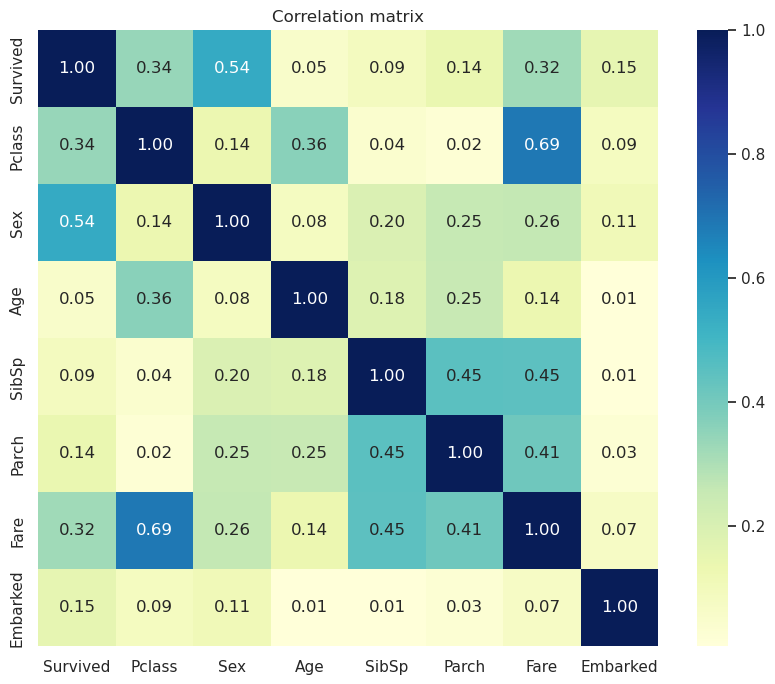

In [15]:
from sklearn.preprocessing import LabelEncoder

# Transform categorical variables 
label_encoder = LabelEncoder()
df_eda['Sex'] = label_encoder.fit_transform(df_eda['Sex'])
df_eda['Embarked'] = label_encoder.fit_transform(df_eda['Embarked'])

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation matrix')
plt.show()


### Preprocessing

In [16]:
from sklearn.model_selection import train_test_split


# Define the features and the target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
import pandas as pd
from scripts.skewness_fixer import SkewnessFixer

# Define the numerical and categorical features
numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']
ordinal_features = ['Pclass', 'SibSp', 'Parch']

# Define preprocessing for numerical features (Imputation only + Skewness Fixer)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('skewness_fixer', SkewnessFixer(skewness_threshold=0.5, boxcox_lambda=0.15))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing for ordinal features (Imputation + OrdinalEncoder)
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Fit and transform the training data without scaling
X_train_noscaled = preprocessor.fit_transform(X_train)
X_test_noscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Extract categorical feature names from the OneHotEncoder
cat_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat']\
                            .named_steps['onehot']\
                            .get_feature_names_out(categorical_features)

# Manually concatenate feature names for all parts (numerical, categorical, ordinal)
feature_names = list(numerical_features) + list(cat_feature_names) + list(ordinal_features)

# Convert the scaled data into a DataFrame with the correct column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_names)

# Convert the noscaled data into a DataFrame with the correct column names
X_train_noscaled_df = pd.DataFrame(X_train_noscaled, index=X_train.index, columns=feature_names)
X_test_noscaled_df = pd.DataFrame(X_test_noscaled, index=X_test.index, columns=feature_names)

# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train.shape)
print(y_test.shape)



(623, 10)
(268, 10)
(623,)
(268,)


### Model training

In [18]:
from sklearn.model_selection import StratifiedKFold
from scripts.ml_class import ml_class_im
from scripts.eval_class import evaluate_models

# Define random state
rs = 42

# Use Stratified KFold for preserving the class distribution in cross-validation
cv = StratifiedKFold(n_splits=5)

# Initialize the models
models = ml_class_im(cv, rs)

# Evaluate the models
parameters, markdown_content = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_content))

Evaluating models: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.725522 |        0.757463 |          0.772433 |         0.80167  |       0.725522 |      0.757463 |   0.729847 |  0.757615 |    0.485562 |   0.55887  |
| KNN                  |         0.842697 |        0.802239 |          0.848071 |         0.807042 |       0.842697 |      0.802239 |   0.836823 |  0.796983 |    0.659305 |   0.590348 |
| Gaussian Naive Bayes |         0.783307 |        0.779851 |          0.783909 |         0.781683 |       0.783307 |      0.779851 |   0.783589 |  0.780494 |    0.536862 |   0.549711 |
| Decision Tree        |         0.784912 |        0.791045 |          0.7824   |         0.789921 |       0.784912 |      0.791045 |   0.782966 |  0.789341 |    0.532598 |   0.565364 |
| Random Forest        |         0.425361 |        0.447761 |          0.774632 |         0.763326 |       0.425361 |      0.447761 |   0.309344 |  0.31203  |    0.184436 |   0.156741 |
| Extra Trees          |         0.869984 |        0.768657 |          0.879378 |         0.788712 |       0.869984 |      0.768657 |   0.871584 |  0.770287 |    0.735841 |   0.552293 |
| AdaBoost             |         0.786517 |        0.791045 |          0.783956 |         0.789921 |       0.786517 |      0.791045 |   0.784464 |  0.789341 |    0.535803 |   0.565364 |
| Neural Networks      |         0.839486 |        0.809701 |          0.841016 |         0.81249  |       0.839486 |      0.809701 |   0.83506  |  0.805725 |    0.650243 |   0.605074 |



### Stack the models

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Stack the models
estimators1 = [('KNN', parameters['KNN']), ('Decision Tree', parameters['Decision Tree']), ('Gaussian Naive Bayes', parameters['Gaussian Naive Bayes'])]
stacking_model1 = StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression(), cv=cv, n_jobs=-1)

estimators2 = [('Random Forest', parameters['Random Forest']), ('Extra Trees', parameters['Extra Trees']), ('AdaBoost', parameters['AdaBoost'])]
stacking_model2 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression(), cv=cv, n_jobs=-1)

estimators3 = [('KNN', parameters['KNN']), ('Decision Tree', parameters['Decision Tree']), ('Gaussian Naive Bayes', parameters['Gaussian Naive Bayes']), ('Random Forest', parameters['Random Forest']), ('Extra Trees', parameters['Extra Trees']), ('AdaBoost', parameters['AdaBoost'])]
stacking_model3 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression(), cv=cv, n_jobs=-1)

# Models dictionary
models_stacked = {
    'Stacking Model 1': stacking_model1,
    'Stacking Model 2': stacking_model2,
    'Stacking Model 3': stacking_model3
}

# Evaluate the models
_ , markdown_stacked_content = evaluate_models(models_stacked, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_stacked_content))

Evaluating models: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


### Model Evaluation

| <center> Model            </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:-----------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Stacking Model 1 |         0.82183  |        0.798507 |          0.82023  |         0.798646 |       0.82183  |      0.798507 |   0.818811 |  0.795567 |    0.611022 |   0.580427 |
| Stacking Model 2 |         0.808989 |        0.794776 |          0.806916 |         0.793809 |       0.808989 |      0.794776 |   0.807152 |  0.7929   |    0.584899 |   0.572977 |
| Stacking Model 3 |         0.834671 |        0.813433 |          0.833176 |         0.813515 |       0.834671 |      0.813433 |   0.832696 |  0.811136 |    0.640375 |   0.611994 |



### Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier

# Define the base model
base_model = parameters['Random Forest']

# Apply Bagging with 50 estimators (you can change n_estimators as needed)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=rs, n_jobs=-1)

# Fit the bagging model to training data
bagging_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = bagging_model.predict(X_train_scaled)
y_pred_test = bagging_model.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.7771324136434757
Test F1 Score: 0.7569662306028861


### Feature Engineering

In [17]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the training scaled data
X_train_poly = polynomial.fit_transform(X_train_scaled_df)
X_test_poly = polynomial.transform(X_test_scaled_df)

# Evaluate the models with polynomial features
_ , markdown_poly_content = evaluate_models(models, X_train_poly, X_test_poly, y_train, y_test)

# Display the results
display(Markdown(markdown_poly_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.76886  |        0.772388 |          0.799445 |         0.804291 |       0.76886  |      0.772388 |   0.77278  |  0.773445 |    0.552822 |   0.574329 |
| KNN                  |         0.829856 |        0.802239 |          0.838695 |         0.810256 |       0.829856 |      0.802239 |   0.821637 |  0.795741 |    0.632365 |   0.592397 |
| Gaussian Naive Bayes |         0.778491 |        0.791045 |          0.777408 |         0.792402 |       0.778491 |      0.791045 |   0.777875 |  0.791546 |    0.522845 |   0.571933 |
| Decision Tree        |         0.786517 |        0.791045 |          0.783524 |         0.790899 |       0.786517 |      0.791045 |   0.782329 |  0.787996 |    0.531908 |   0.564592 |
| Random Forest        |         0.831461 |        0.794776 |          0.839993 |         0.801003 |       0.831461 |      0.794776 |   0.833376 |  0.796021 |    0.653077 |   0.587068 |
| Extra Trees          |         0.807384 |        0.764925 |          0.819874 |         0.777758 |       0.807384 |      0.764925 |   0.809958 |  0.766659 |    0.607983 |   0.535292 |
| AdaBoost             |         0.799358 |        0.783582 |          0.830762 |         0.815673 |       0.799358 |      0.783582 |   0.780075 |  0.768079 |    0.577285 |   0.569978 |
| Neural Networks      |         0.855538 |        0.798507 |          0.85822  |         0.800166 |       0.855538 |      0.798507 |   0.851554 |  0.794565 |    0.686608 |   0.580816 |



### Model trainig with kernel approximation

In [18]:
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Kernel SVR
kernel_svr = SVC()
param_grid = {
    'gamma': [0.001, 0.01, 0.1],
    'C': [0.01, 0.1, 1, 10, 100],
    }
kernel_svr_grid_search = GridSearchCV(estimator=kernel_svr, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Linear SVR
linear_svr = LinearSVC(random_state=rs)
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
}
linear_svr_grid_search = GridSearchCV(estimator=linear_svr, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# SGD Regressor
sgd_reg = SGDClassifier(random_state=rs, max_iter=3000)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}
sgd_reg_grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Create pipeline from kernel approximation
# and linear support vector regression (SVR) or SGDRegressor
feature_map_fourier = RBFSampler(random_state=rs)
feature_map_nystroem = Nystroem(random_state=rs)

# Fourier Approximation with Linear SVR
fourier_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_svr, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)


# Fourier Approximation with SGDRegressor
fourier_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10) 
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_sgd, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Nystroem Approximation with Linear SVR
nystroem_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_svr_grid_search = GridSearchCV(estimator=nystroem_approx_svr, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Nystroem Approximation with SGDRegressor
nystroem_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_sgd_grid_search = GridSearchCV(estimator=nystroem_approx_sgd, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Dictionary of models for regression
models_kernel_reg = {
    'Kernel SVR': kernel_svr_grid_search,
    'Linear SVR': linear_svr_grid_search,
    'SGD Regressor': sgd_reg_grid_search,
    'Fourier Approximation with Linear SVR': fourier_approx_sgd_grid_search,
    'Fourier Approximation with SGDRegressor': fourier_approx_sgd_grid_search,
    'Nystroem Approximation with Linear SVR': nystroem_approx_svr_grid_search,
    'Nystroem Approximation with SGDRegressor': nystroem_approx_sgd_grid_search
}

# Define the evaluation function (you'll need to adapt it for regression)
_ ,markdown_kernel_content = evaluate_models(models_kernel_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
display(Markdown(markdown_kernel_content))

Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Evaluating models:  43%|████▎     | 3/7 [00:00<00:00,  8.05it/s]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  57%|█████▋    | 4/7 [00:00<00:00,  5.65it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  71%|███████▏  | 5/7 [00:01<00:00,  4.42it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  86%|████████▌ | 6/7 [00:01<00:00,  3.30it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]


### Model Evaluation

| <center> Model                                    </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:-----------------------------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Kernel SVR                               |         0.857143 |        0.809701 |          0.863605 |         0.816663 |       0.857143 |      0.809701 |   0.851931 |  0.804061 |    0.692428 |   0.607606 |
| Linear SVR                               |         0.797753 |        0.798507 |          0.795652 |         0.79753  |       0.797753 |      0.798507 |   0.796148 |  0.796865 |    0.56118  |   0.580995 |
| SGD Regressor                            |         0.784912 |        0.791045 |          0.7824   |         0.789921 |       0.784912 |      0.791045 |   0.782966 |  0.789341 |    0.532598 |   0.565364 |
| Fourier Approximation with Linear SVR    |         0.853933 |        0.813433 |          0.860872 |         0.823557 |       0.853933 |      0.813433 |   0.848352 |  0.806992 |    0.685542 |   0.617774 |
| Fourier Approximation with SGDRegressor  |         0.853933 |        0.813433 |          0.860872 |         0.823557 |       0.853933 |      0.813433 |   0.848352 |  0.806992 |    0.685542 |   0.617774 |
| Nystroem Approximation with Linear SVR   |         0.852327 |        0.80597  |          0.856537 |         0.809103 |       0.852327 |      0.80597  |   0.847556 |  0.801651 |    0.680251 |   0.597339 |
| Nystroem Approximation with SGDRegressor |         0.849117 |        0.809701 |          0.856793 |         0.822713 |       0.849117 |      0.809701 |   0.842953 |  0.802137 |    0.675202 |   0.61192  |



### Dimensional Reduction

In [19]:
# Compute the PCA for the data

from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=0.99, random_state=rs, whiten=True)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_noscaled)
X_test_pca = pca.transform(X_test_noscaled)

# Display the shape of the data
print(X_train_pca.shape)
print(X_test_pca.shape)

# Evaluate the models with PCA
_ , markdown_pca_content = evaluate_models(models, X_train_pca, X_test_pca, y_train, y_test)

# Display the results
display(Markdown(markdown_pca_content))


(623, 3)
(268, 3)


Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]

Evaluating models: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.473515 |        0.492537 |          0.718567 |         0.706337 |       0.473515 |      0.492537 |   0.405621 |  0.406978 |    0.215185 |   0.205938 |
| KNN                  |         0.760835 |        0.705224 |          0.756566 |         0.701986 |       0.760835 |      0.705224 |   0.755813 |  0.699064 |    0.474129 |   0.38052  |
| Gaussian Naive Bayes |         0.714286 |        0.705224 |          0.706897 |         0.708606 |       0.714286 |      0.705224 |   0.699928 |  0.690097 |    0.358587 |   0.37903  |
| Decision Tree        |         0.569823 |        0.634328 |          0.732155 |         0.779134 |       0.569823 |      0.634328 |   0.550627 |  0.612128 |    0.317624 |   0.422775 |
| Random Forest        |         0.568218 |        0.634328 |          0.731357 |         0.779134 |       0.568218 |      0.634328 |   0.548596 |  0.612128 |    0.315454 |   0.422775 |
| Extra Trees          |         0.370787 |        0.414179 |          0.137483 |         0.171544 |       0.370787 |      0.414179 |   0.200589 |  0.242606 |    0        |   0        |
| AdaBoost             |         0.739968 |        0.742537 |          0.734351 |         0.745829 |       0.739968 |      0.742537 |   0.732797 |  0.733211 |    0.424778 |   0.461285 |
| Neural Networks      |         0.701445 |        0.723881 |          0.6937   |         0.728131 |       0.701445 |      0.723881 |   0.694542 |  0.71136  |    0.340045 |   0.420776 |



### Feature Selection

In [20]:
# Fit the Random Forest model
rf_model = parameters['Random Forest']

rf_model.fit(X_train_scaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
print("Top features using Random Forest:", top_features_rf)


Top features using Random Forest: ['Fare' 'Age' 'Sex_female' 'Sex_male' 'Pclass' 'SibSp' 'Parch']


In [21]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Evaluate the models with the top features
_ , markdown_top_content = evaluate_models(models, X_train_top_rf, X_test_top_rf, y_train, y_test)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models: 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.720706 |        0.772388 |          0.769684 |         0.813898 |       0.720706 |      0.772388 |   0.725008 |  0.772797 |    0.478479 |   0.585546 |
| KNN                  |         0.833066 |        0.817164 |          0.83301  |         0.819301 |       0.833066 |      0.817164 |   0.829206 |  0.813824 |    0.63555  |   0.620544 |
| Gaussian Naive Bayes |         0.788122 |        0.787313 |          0.787095 |         0.786614 |       0.788122 |      0.787313 |   0.787533 |  0.786863 |    0.5436   |   0.560123 |
| Decision Tree        |         0.370787 |        0.414179 |          0.137483 |         0.171544 |       0.370787 |      0.414179 |   0.200589 |  0.242606 |    0        |   0        |
| Random Forest        |         0.749599 |        0.776119 |          0.791935 |         0.812784 |       0.749599 |      0.776119 |   0.753709 |  0.776868 |    0.528842 |   0.587408 |
| Extra Trees          |         0.764045 |        0.776119 |          0.799041 |         0.812784 |       0.764045 |      0.776119 |   0.768043 |  0.776868 |    0.548824 |   0.587408 |
| AdaBoost             |         0.794543 |        0.798507 |          0.79257  |         0.79745  |       0.794543 |      0.798507 |   0.793135 |  0.797244 |    0.554789 |   0.581476 |
| Neural Networks      |         0.82825  |        0.817164 |          0.826913 |         0.817666 |       0.82825  |      0.817164 |   0.82534  |  0.814708 |    0.625258 |   0.619925 |



In [22]:
from sklearn.feature_selection import RFECV

# Initialize the RFECV
rfecv = RFECV(rf_model, cv=cv)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train)

# Number of features
top_features_rfecv = X_train_scaled_df.columns[rfecv.support_]
print( "Features selected by RFECV: ", top_features_rfecv)

Features selected by RFECV:  Index(['Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S',
       'Pclass', 'SibSp', 'Parch'],
      dtype='object')


In [24]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.loc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.loc[:, top_features_rfecv]

# Evaluate the models with the top features
_ , markdown_top_content = evaluate_models(models, X_train_top_rfecv, X_test_top_rfecv, y_train, y_test)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.725522 |        0.757463 |          0.772433 |         0.80167  |       0.725522 |      0.757463 |   0.729847 |  0.757615 |    0.485562 |   0.55887  |
| KNN                  |         0.831461 |        0.802239 |          0.832631 |         0.805728 |       0.831461 |      0.802239 |   0.826683 |  0.797559 |    0.632112 |   0.589603 |
| Gaussian Naive Bayes |         0.781701 |        0.779851 |          0.782522 |         0.781683 |       0.781701 |      0.779851 |   0.782079 |  0.780494 |    0.533866 |   0.549711 |
| Decision Tree        |         0.601926 |        0.641791 |          0.68382  |         0.692298 |       0.601926 |      0.641791 |   0.602726 |  0.639635 |    0.284338 |   0.337311 |
| Random Forest        |         0.812199 |        0.791045 |          0.834856 |         0.811275 |       0.812199 |      0.791045 |   0.815262 |  0.792518 |    0.632324 |   0.597776 |
| Extra Trees          |         0.714286 |        0.746269 |          0.77066  |         0.798945 |       0.714286 |      0.746269 |   0.718252 |  0.745562 |    0.475167 |   0.546266 |
| AdaBoost             |         0.786517 |        0.791045 |          0.783956 |         0.789921 |       0.786517 |      0.791045 |   0.784464 |  0.789341 |    0.535803 |   0.565364 |
| Neural Networks      |         0.853933 |        0.817164 |          0.85624  |         0.819301 |       0.853933 |      0.817164 |   0.850016 |  0.813824 |    0.68285  |   0.620544 |



### XGBoost

In [25]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import RandomizedSearchCV

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 5, 10]
}

es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
)

# Initialize XGBoost Regressor model
xgb_model = XGBClassifier(verbosity=0, random_state=42, callbacks=[es], eval_metric='logloss', objective='binary:logistic')   

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=cv, n_jobs=-1, verbose=0, scoring='f1')

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train, 
             eval_set=[(X_test_scaled, y_test)],
            verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train, xgb_grid.predict(X_train_scaled), average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.8632011185348355
Test F1 Score: 0.813343729115616


### Neural Network 


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-17 20:46:13.162884: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:46:13.166991: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:46:13.174929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 20:46:13.189580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 20:46:13.193763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 20:46:13.208965: I tensorflow/core/platform/cpu_feature_gu

In [27]:
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=5, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(5):
    hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[32, 64, 128, 256])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation')
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid')) # Binary classification. Pueden realizarse clasificaciones binarias simultaneas con 2 neuronas con la funcion de activacion signmoid
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='binary_crossentropy',
        metrics=metrics,
    )
    
    return model


In [28]:
# Create the tuner with Bayesian Optimization
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_prc', direction='max'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_prc', patience=10, mode='max', restore_best_weights=True),
                TensorBoard(log_dir='logs')]



In [29]:
# Run the tuner
tuner.search(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 09s]
val_prc: 0.6158003807067871

Best val_prc So Far: 0.8864166736602783
Total elapsed time: 00h 06m 40s
Best Hyperparameters: {'layers': 2, 'units_0': 16, 'dropout_0': 0.1, 'units_1': 48, 'dropout_1': 0.30000000000000004, 'units_2': 64, 'dropout_2': 0.0, 'units_3': 40, 'dropout_3': 0.4, 'units_4': 104, 'dropout_4': 0.2, 'activation': 'tanh', 'learning_rate': 0.01, 'batch_size': 32, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0071'}


In [30]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train,
    epochs=30, 
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size')
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6428 - auc: 0.6681 - fn: 106.4286 - fp: 108.0000 - loss: 0.6373 - prc: 0.5929 - precision: 0.5448 - recall: 0.5544 - tn: 269.1429 - tp: 133.2857 - val_accuracy: 0.7799 - val_auc: 0.8725 - val_fn: 32.0000 - val_fp: 27.0000 - val_loss: 0.4412 - val_prc: 0.8343 - val_precision: 0.7453 - val_recall: 0.7117 - val_tn: 130.0000 - val_tp: 79.0000
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - auc: 0.8078 - fn: 46.3333 - fp: 37.5714 - loss: 0.5081 - prc: 0.7551 - precision: 0.6854 - recall: 0.6298 - tn: 182.5714 - tp: 82.3810 - val_accuracy: 0.8022 - val_auc: 0.8831 - val_fn: 33.0000 - val_fp: 20.0000 - val_loss: 0.4385 - val_prc: 0.8615 - val_precision: 0.7959 - val_recall: 0.7027 - val_tn: 137.0000 - val_tp: 78.0000
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - auc: 0.8424 - fn: 48.0476 - fp: 25.9524 - loss: 0.4606 - prc: 0.7924 - precision: 0.7729 - recall: 0.6250 - tn: 194.1905 

In [31]:
# Predict the target values using the trained model
y_pred_train_b = history.predict(X_train_scaled)
y_pred_test_b = history.predict(X_test_scaled)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


In [32]:

# Convert the predicted probabilities to binary values
y_pred_train = (y_pred_train_b > 0.5).astype(int) #Because the output is a probability from the sigmoid function. Probaility than the output is 1
y_pred_test = (y_pred_test_b > 0.5).astype(int)

# Compute the F1 score for the training and test data
_,_,f1_train,_ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')   

# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.8137557396920051
Test F1 Score: 0.8102594751261412


In [33]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 48)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,125 (12.21 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,084 (8.14 KB)

### Model Evaluation and Selection

Since this dataset is slightly imbalanced, we prioritize the **F1-score** for model evaluation. Based on this metric, the **Neural Network** performs the best, achieving one of the highest scores on the test data. Furthermore, its training score is closely aligned with the test score, indicating strong generalization. In contrast, other models show a much higher training score, suggesting overfitting, which could reduce their reliability on unseen data.